In [1]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [5]:
kaggle_credentails = json.load(open("/content/kaggle (1).json"))

In [8]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [9]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:11<00:00, 179MB/s]
100% 2.04G/2.04G [00:11<00:00, 197MB/s]


In [10]:

!ls

'kaggle (1).json'   plantvillage-dataset.zip   sample_data


In [11]:

# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [12]:

print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Pepper,_bell___Bacterial_spot', 'Tomato___Bacterial_spot', 'Apple___healthy', 'Peach___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
38
['Pepper,_bell___Bacterial_spot', 'Tomato___Bacterial_spot', 'Apple___healthy', 'Peach___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']
38
['Pepper,_bell___Bacterial_spot', 'Tomato___Bacterial_spot', 'Apple___healthy', 'Peach___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot']


In [13]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])


423
['fabd2864-3431-4f44-b3bf-fa3af593fe05___Mt.N.V_HL 9002.JPG', '666536ee-371f-46c2-b20d-f6fc87847cb1___Mt.N.V_HL 8944.JPG', '55b69a06-7f10-41b1-8033-cc9e6c2bea5c___Mt.N.V_HL 8949.JPG', '1773d4a6-5c0e-4597-9b1e-34574195b19b___Mt.N.V_HL 8993.JPG', 'f8d88a5d-df3b-46b0-ad41-547660c582ad___Mt.N.V_HL 6101.JPG']


In [14]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


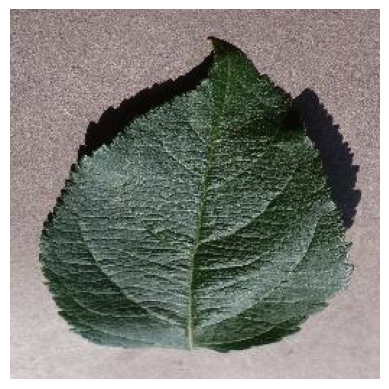

In [15]:

image_path = '/content/plantvillage dataset/color/Apple___healthy/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [16]:
image_path = '/content/plantvillage dataset/color/Apple___healthy/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[129 115 114]
  [133 119 118]
  [110  96  95]
  ...
  [115  99  99]
  [134 118 118]
  [160 144 144]]

 [[128 114 113]
  [130 116 115]
  [152 138 137]
  ...
  [143 127 127]
  [161 145 145]
  [117 101 101]]

 [[105  91  90]
  [157 143 142]
  [139 125 124]
  ...
  [149 133 133]
  [130 114 114]
  [145 129 129]]

 ...

 [[224 219 216]
  [221 216 213]
  [217 212 209]
  ...
  [189 177 177]
  [189 177 177]
  [189 177 177]]

 [[222 217 214]
  [219 214 211]
  [215 210 207]
  ...
  [188 176 176]
  [188 176 176]
  [190 178 178]]

 [[213 208 205]
  [211 206 203]
  [208 203 200]
  ...
  [191 179 179]
  [191 179 179]
  [193 181 181]]]


In [17]:
# Image Parameters
img_size = 224
batch_size = 32

In [18]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [19]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [20]:

# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [21]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [22]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [23]:

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 653s 480ms/step - loss: 0.9644 - accuracy: 0.7362 - val_loss: 0.4379 - val_accuracy: 0.8603
Epoch 2/5
1358/1358 [==============================] - 650s 478ms/step - loss: 0.2794 - accuracy: 0.9111 - val_loss: 0.4158 - val_accuracy: 0.8751
Epoch 3/5
1358/1358 [==============================] - 659s 485ms/step - loss: 0.1242 - accuracy: 0.9597 - val_loss: 0.4442 - val_accuracy: 0.8796
Epoch 4/5
1358/1358 [==============================] - 652s 480ms/step - loss: 0.0912 - accuracy: 0.9707 - val_loss: 0.4599 - val_accuracy: 0.8868
Epoch 5/5
1358/1358 [==============================] - 650s 478ms/step - loss: 0.0625 - accuracy: 0.9811 - val_loss: 0.5860 - val_accuracy: 0.8684


Model EValuation


In [25]:

# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
339/339 [==============================] - 26s 77ms/step - loss: 0.5857 - accuracy: 0.8685
Validation Accuracy: 86.85%


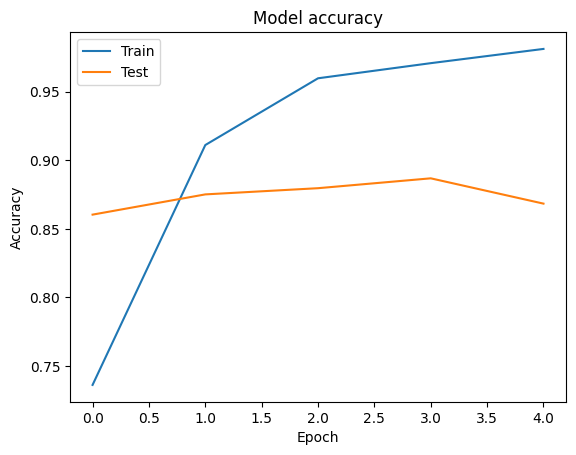

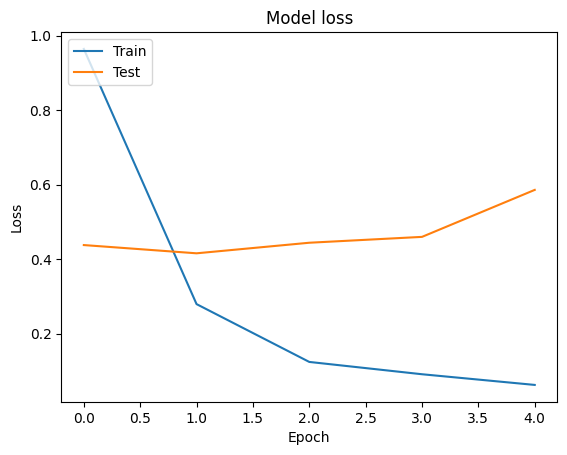

In [26]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name



In [28]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [29]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [30]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [35]:
# Example Usage
# image_path = '/content/test_1_brot.JPG'
image_path = '/content/test_2_brot.JPG'
# image_path = '/content/test_3_brot.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)


1/1 [==============================] - 0s 54ms/step
Predicted Class Name: Blueberry___healthy


In [37]:
model.save('plant_disease_prediction_model.keras')

In [38]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [39]:
!wget -q -O - ipv4.icanhazip.com

35.223.154.95


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.223.154.95:8501

npx: installed 22 in 5.712s
your url is: https://cyan-cars-visit.loca.lt
1/1 [==============================] - 0s 93ms/step
